In [ ]:
## colab에서 실행함.

In [1]:
# !pip install opencv-python    # OpenCV 설치

In [ ]:
# “사진을 읽어서(OpenCV가 다룰 수 있게 만들고) → 흑백으로 바꾼 다음 → 얼굴을 찾아서 → 얼굴 위치에 네모를 그리고 → 결과를 보여준다”

In [3]:

import numpy as np                  # numpy 라이브러리 불러오기
import cv2                          # OpenCV 라이브러리 불러오기
from google.colab.patches import cv2_imshow
face_cascade = cv2.CascadeClassifier(
       cv2.data.haarcascades +
       'haarcascade_frontalface_default.xml'
   )                                   # OpenCV에서 얼굴을 찾는 알고리즘 파일 불러오기
from google.colab import drive      # 구글 드라이브에서 코랩 불러오기
drive.mount('/content/drive')       # 저장된 이미지 파일을 가져오기 위해 구글 드라이브에 접속하기
file_name = '/content/drive/MyDrive/0-ㄱ-CODEIT(2025)/deep/img/face.png'    # 구글 드라이브의 절대 주소를 path에 저장하기


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


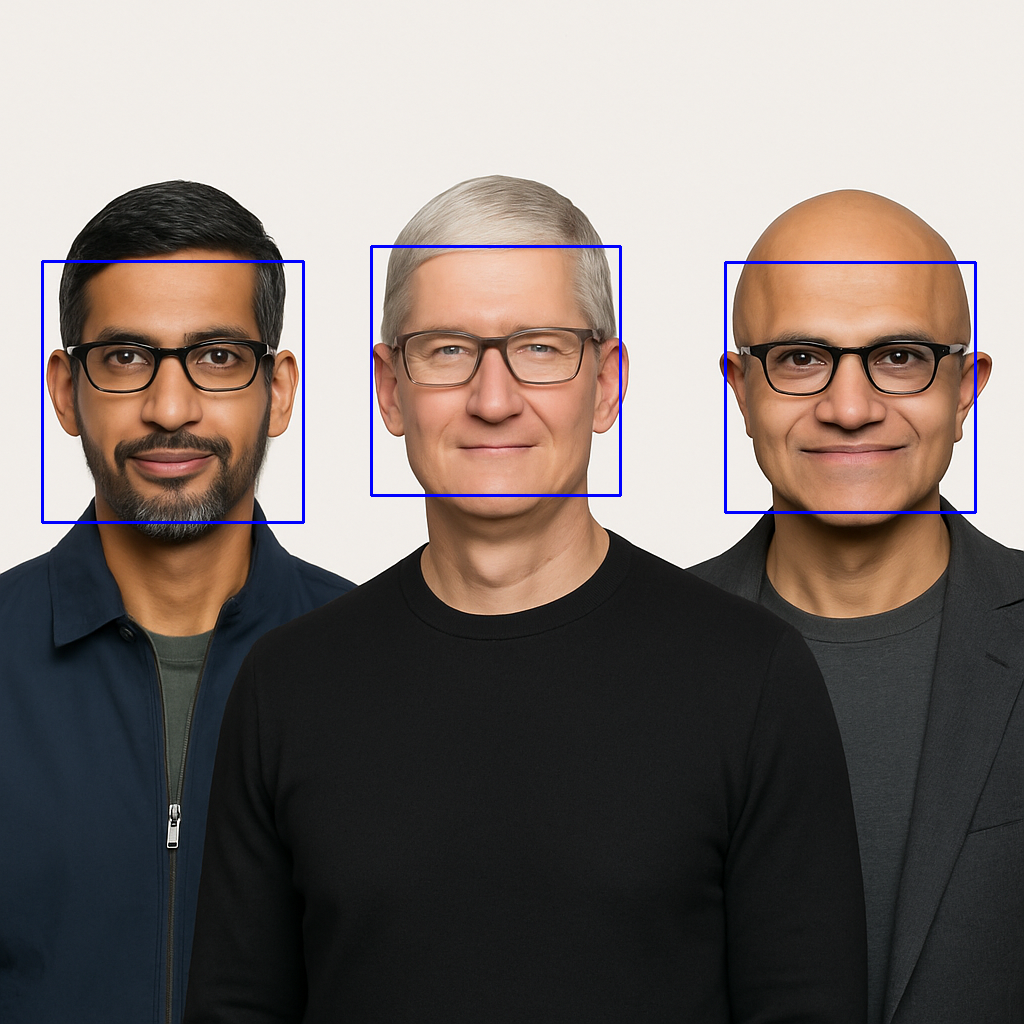

In [10]:
ff = np.fromfile(file_name, np.uint8)
# 구글 드라이브에 있는 사진 파일의 “전체 주소”를 만든 것
# np.fromfile(...) : 사진 파일을 그대로 바이트(숫자 덩어리)로 읽어 오는 것
# np.uint8 : 사진은 보통 픽셀 값이 0~255 범위라서 이 형식(8비트 정수)을 씀.


img = cv2.imdecode(ff, cv2.IMREAD_UNCHANGED)
# imdecode를 통해 numpy의 이미지 파일을 OpenCV 이미지로 불러오기
# cv2.imdecode(...) : 아까 읽은 “숫자 덩어리(ff)”를 OpenCV가 다룰 수 있는 이미지 형태(행렬) 로 바뀜.
# cv2.IMREAD_UNCHANGED : 사진을 원래 상태 그대로 읽겠다.(색/투명도 등 가능한 정보 보존).


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 이미지에서 얼굴을 찾기 위해 흑백으로 처리하기
# 얼굴을 찾는 알고리즘은 컬러보다 흑백(명암) 이 더 단순해서 보통 흑백으로 바꿔서 처리
# BGR : OpenCV는 색을 보통 파랑-초록-빨강(BGR) 순서로 저장
# GRAY : 흑백(밝기만 남김)

faces = face_cascade.detectMultiScale(gray, 1.2, 5)
# 여러 개의 얼굴을 인식하기 (검출 비율 1.2, 이웃 거리 5)

# face_cascade : 이미 앞에서 불러온 “얼굴 찾는 규칙(모델)”(하르 캐스케이드).
# detectMultiScale(...) : 사진에서 얼굴일 가능성이 있는 위치를 여러 크기로(멀티 스케일) 돌려가며 찾아줌.
# 결과 faces 는 보통 이런 정보가 여러 개 들어 있는 목록
  # (x, y, w, h)
  # x, y = 얼굴 네모의 시작점(왼쪽 위)
  # w, h = 네모의 너비와 높이
  # ==> 흑백 사진에서 얼굴 위치들을 찾아서 리스트로 받았다.

for (x, y, w, h) in faces:
        # 이미지 얼굴에 사각형 그리기
  # 얼굴이 한 명일 수도 있고 여러 명일 수도 있으니,
  # faces 안에 들어있는 얼굴 정보들을 하나씩 꺼내서 반복하는 줄

  cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
          # rectangle(이미지 파일, 시작점, 종료점, 색상, 선 두께)

cv2_imshow(img)
          # 얼굴이 인식된 사진 출력하기


In [15]:
# !pip install gtts
import IPython
from gtts import gTTS
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/0-ㄱ-CODEIT(2025)/deep/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
text = '안녕하세요 나는 서예진입니다. 지금 기말고사 중입니다.'
tts = gTTS(text = text, lang = 'ko') #slow=True (다소 또박또박)
tts.save(path + 'tts.mp3')
IPython.display.Audio(path + 'tts.mp3')


In [20]:
# !pip -q install edge-tts

import edge_tts #ms
import IPython

text = "안녕하세요. 저는 예진이입니다.! 배가 고픕니다."
# voice = "ko-KR-SunHiNeural"   # 예: 여성 음성,  "ko-KR-InJoonNeural", # 남성(환경에 따라 이름이 다를 수 있음)
voice = "ko-KR-InJoonNeural"
out = path + "tts_edge.mp3"
communicate = edge_tts.Communicate(text, voice)
await communicate.save(out)

IPython.display.Audio(out)


In [28]:
# !pip -q install googletrans==4.0.0-rc1 httpx==0.13.3 httpcore==0.9.1 h11==0.9.0

import googletrans
from googletrans import Translator

trans = Translator()
print(googletrans.__version__)


4.0.0-rc.1


In [27]:
str1 = '행복하세요'
result1 = trans.translate(str1, dest = 'en', src = 'ko')
print(result1.text)

be happy


In [29]:
str2 = 'I am happy'
result2 = trans.translate(str2, dest = 'ko', src = 'en')
print(result2.text)


나는 행복하다
